In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import AgglomerativeClustering, OPTICS, KMeans

In [2]:
import hdbscan

In [3]:
import numpy as np
import pandas as pd


In [4]:
from sklearn.manifold import TSNE

In [5]:
#importing data from nlp_dataset
series = pd.read_csv("../data/pnlp_data_en.csv", delimiter=';')['Comments']

In [6]:
print(series)

0        we do what our customers need, we communicate ...
1        Customs business development continues to grow...
2        I think the team work hard, are committed to c...
3        Overall working towards a customer centric env...
4        Customer centricity is a growing culture in th...
                               ...                        
17667    FOR THE PAST YEARS THE COMPANY HAS COMMITED TO...
17668    A LOT NEEDS TO BE IMPROVED IN THE SENSE OF TRE...
17669                            not enough space provided
17670    [Name] I have no respect for due to his attitu...
17671                                                Other
Name: Comments, Length: 17672, dtype: object


In [7]:
from utilities import preprocessing, evaluation

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Saurabh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Saurabh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Saurabh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [8]:
preprocessing_param = {

            'punctuation': True,
            'tokenize': True,
            'stopwords': True,
            'correct_apos': True,
            'shortWords': True,
            'specialCharacter': True,
            'numbers': True,
            'singleChar': True,
            'lematization': True,
            'stemming': False,

    }

In [9]:
## preprocessing same as before
data = preprocessing(series, **preprocessing_param).to_frame().rename(columns={"Comments": "comment_clean"})

In [10]:
data['comment_raw'] = series

In [11]:
print(data)

                                           comment_clean  \
0           [customer, need, communicate, aperiodically]   
1      [custom, business, development, continues, gro...   
2      [think, team, work, hard, committed, continuou...   
3      [overall, working, towards, customer, centric,...   
4      [customer, centricity, growing, culture, compa...   
...                                                  ...   
17667  [past, year, company, commited, update, equipm...   
17668  [lot, need, improved, sense, treating, everbod...   
17669                          [enough, space, provided]   
17670  [name, respect, due, attitudework, ethic, thin...   
17671                                                 []   

                                             comment_raw  
0      we do what our customers need, we communicate ...  
1      Customs business development continues to grow...  
2      I think the team work hard, are committed to c...  
3      Overall working towards a customer c

In [12]:
import _pickle

In [13]:
## import embeddings , for this notebook, bert embeddings used
with open("_mean_embeddings", "rb") as fp:
    # Export to file.
     a =  _pickle.load(fp)

In [14]:
print(np.shape(np.array(a)))

(17663, 3072)


In [15]:
data = data[data['comment_clean'].map(lambda x: len(x) > 0)]
print(np.shape(data))

(17663, 2)


In [16]:
data['embedding'] = a

In [17]:
clustering_data = np.array(data['embedding'].tolist())

In [18]:
clustering_data = MinMaxScaler(feature_range=[0, 1]).fit_transform(clustering_data)

In [20]:
import umap.umap_ as umap

In [21]:
# PCA dimensionality reduction to improve performance and maintain variance.
clustering_data = PCA(n_components=150).fit_transform(clustering_data)
# UMAP dimensionality reduction to more cleanly separate clusters and improve performance.
print('Performing dim reduction ...')
reducer = umap.UMAP(metric='cosine', random_state=42, min_dist=0.0, spread=5, n_neighbors=19)
clustering_data = reducer.fit(clustering_data).embedding_


Performing dim reduction ...


C:\Users\Saurabh\Anaconda3\envs\nlp\lib\site-packages\umap\umap_.py:1157: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))
C:\Users\Saurabh\Anaconda3\envs\nlp\lib\site-packages\numba\np\ufunc\parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 11000. The TBB threading layer is disabled.
  warnings.warn(problem)


In [23]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
## viewing the clustering data and applying clustering using different parameters
projection = TSNE().fit_transform(clustering_data)


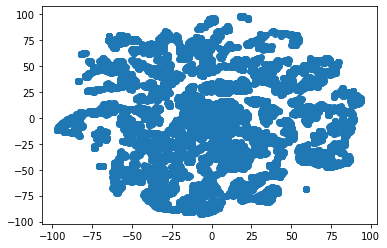

In [25]:
plt.scatter(*projection.T)

In [27]:
import seaborn as sns

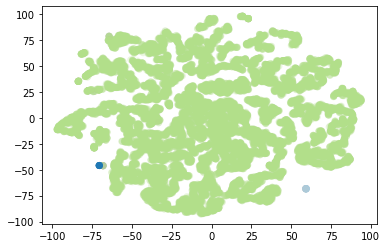

In [28]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15).fit(clustering_data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

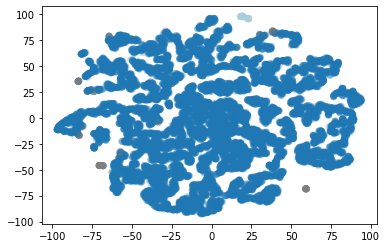

In [29]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30).fit(clustering_data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

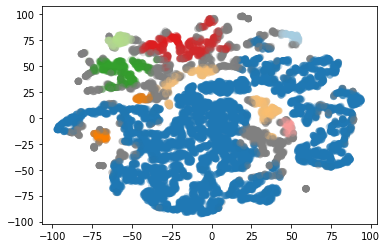

In [32]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60).fit(clustering_data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

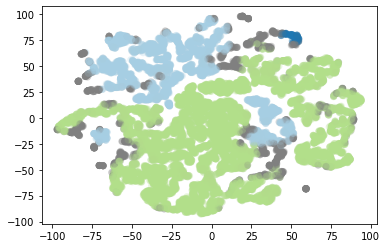

In [39]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=100).fit(clustering_data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

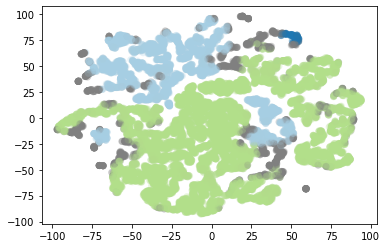

In [44]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=60, min_samples=100, cluster_selection_epsilon=0.3 ).fit(clustering_data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)

In [45]:
from sklearn.neighbors import NearestNeighbors

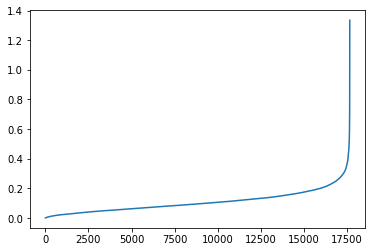

In [49]:
##curvature for epsilon value in dbscan so 0.4 should be the epsilon value, 
## https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

neigh = NearestNeighbors(n_neighbors=19)
nbrs = neigh.fit(clustering_data)
distances, indices = nbrs.kneighbors(clustering_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [54]:
print(np.shape(np.array(clustering_data)))

(17663, 2)


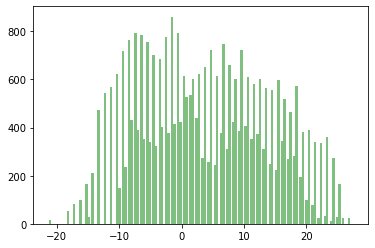

In [56]:
plt.hist(clustering_data, 50, facecolor='green', alpha=0.5)

In [62]:
print(np.shape(np.array(clusterer.labels_)))

(17663,)


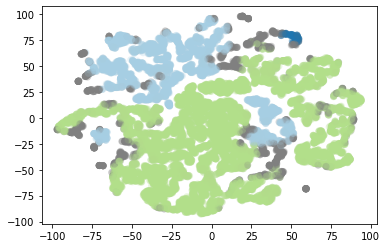

In [67]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=30, min_samples=100, cluster_selection_epsilon=0.3 ).fit(clustering_data)
color_palette = sns.color_palette('Paired', 12)
cluster_colors = [color_palette[x] if x >= 0
                  else (0.5, 0.5, 0.5)
                  for x in clusterer.labels_]
cluster_member_colors = [sns.desaturate(x, p) for x, p in
                         zip(cluster_colors, clusterer.probabilities_)]
plt.scatter(*projection.T, s=50, linewidth=0, c=cluster_member_colors, alpha=0.25)



